In [1]:
import tensorflow as tf
%matplotlib inline
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import os
from IPython.display import display, clear_output

In [2]:
from cosmosis.runtime.pipeline import LikelihoodPipeline
from cosmosis.runtime.config import Inifile
import numpy as np
import pandas as pd


# N:B The start vector for params_fiducial was all set at the middle point 

#################################################
# Read in the cosmosis configuration file pipeline.ini 
inifile = 'pipeline11.ini'
ini = Inifile(inifile) 
#################################################

##################################################
# (optional) You can change things or read from ini: 

# set the value of MY_PATH in the [DEFAULT] section to /Users/username/Documents/repos/
# ini.set("DEFAULT","MY_PATH","/Users/username/Documents/repos/")

# get the value of modules in the [pipeline] section
# ini.get("pipeline","modules")

# ini.set("pipeline","modules","sample_S8 sigma8toAs camb")
####################################################

####################################################
# setup the pipeline and give it the ini values
pipeline = LikelihoodPipeline(ini)
# Get the fiducial values
params_fiducial = pipeline.start_vector()
# run the pipeline for the given parameters. All results are saved in block
block    = pipeline.run_parameters(params_fiducial)
stats_name_cosmosis ="cosebis"
# read in cosebis from block
nbin_a=block["shear_cl","nbin_a"] 
nbin_b=block["shear_cl","nbin_b"]
counter=0
for i_bin in range(1,nbin_a+1): 
	for j_bin in range(1,nbin_b+1): 
		name_in="bin_"+str(j_bin)+("_")+str(i_bin)
		if(block.has_value(stats_name_cosmosis, name_in)):
			th = block[stats_name_cosmosis,name_in]
			if(counter==0):
				th_all=th.copy()
			else:
				th_all=np.hstack((th_all,th))
			counter+=1


# th_all should have 75 values: 5 modes x 15 redshift bin combinations (we have 5 redshift bins which create 5*6/2 Unique combinations)
# You want to create th_all for different values of parameters. Currently it will only do this for the fiducial values. 





# Other useful commands:
# list of varied parameter names
param_names_varied = pipeline.varied_params


# # You can modify which parameters you vary or fix
# pipeline.set_varied("cosmological_parameters", "omch2", 0.2, 0.4)
# pipeline.set_fixed("cosmological_parameters", "h0", 0.72) 

Loading number density data from /Users/apple/Downloads//cosebis_KIDS1000_BlindC_with_m_bias_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2_goldclasses_Flag_SOM_Fid.fits:
    Looking at FITS extension NZ_SOURCE:
        Found 5 bins
        Putting n(0) = 0 at the start of the n(z)
Calculating Limber: Kernel 1 = ('F', 'source'), Kernel 2 = ('F', 'source'), P_3D = MatterPower3D  --> Output: shear_cl
Will project these spectra into 2D:
    -  shear_cl




*********in COSEBIs interface setup*********

Could not load input_section_name to COSEBIs,setting to default: shear_cl
got the value of output_section_name:cosebis
Caluclating E-modes
got the value of theta_min=0.5
got the value of theta_max=300
got the value of n_max=5
not using c_term correction
WnLog folder name is:/Users/apple/Downloads//WnLog/
Root and Norms folder name is:/Users/apple/Downloads//cosebis_cosmosis//TLogsRootsAndNorms/
T_pm folder name is:/Users/apple/Downloads//cosebis_cosmosis//TpnLog/
in COSEBIs initialize
setting En parameters in COSEBIs
nMaximum=5
theta_min=0.000145444
theta_max=0.0872665
Wn not set setting now:
setting thetamin,thetamax,nMax
nMax=5
reading T1  roots	reading T1  normalization
reading T2  roots	reading T2  normalization
reading T3  roots	reading T3  normalization
reading T4  roots	reading T4  normalization
reading T5  roots	reading T5  normalization
set order of WnLog
LLOW=0 LHIGH=11.6491 NLBINS=1000000
log [0,11.6491] N=1000000)
set order of

Setup all pipeline modules
Module timing:
sample_S8 0.023816
sigma8toAs 0.016167
camb 0.018635
load_nz_fits 0.577700
extrapolate_power 0.017161
linear_alignment 0.016187
projection 0.017415
cosebis 10.743047

Parameter Priors
----------------
cosmological_parameters--omch2      ~ U(0.051, 0.255)
cosmological_parameters--ombh2      ~ U(0.019, 0.026)
cosmological_parameters--h0         ~ U(0.64, 0.82)
cosmological_parameters--n_s        ~ U(0.84, 1.1)
cosmological_parameters--s_8_input  ~ U(0.1, 1.3)
cosmological_parameters--omega_k    ~ delta(0.0)
cosmological_parameters--w          ~ delta(-1.0)
cosmological_parameters--wa         ~ delta(0.0)
cosmological_parameters--mnu        ~ delta(0.06)
halo_model_parameters--logt_agn     ~ U(7.6, 8.0)
intrinsic_alignment_parameters--a   ~ U(-6.0, 6.0)

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.489 seconds
camb took: 5.216 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.074 seconds
linear_alignment took: 0.007 seconds
pr

In [3]:
n_params = 7
n_samples = 100 

# parameter ranges

omch2=      np.linspace(0.1157, 0.1157, n_samples)
ombh2 =     np.linspace(0.0225,    0.0225,   n_samples)
h0 =         np.linspace(0.6898,    0.6898,    n_samples)
n_s =        np.linspace(0.969,    0.969,    n_samples)
s8_input =      np.linspace(0.1,    1.3,    n_samples)
halo_model =      np.linspace(7.8,      7.8,    n_samples) 
intrinsic_A =      np.linspace(1.0,     1.0,    n_samples) 


In [4]:
df = pd.DataFrame([omch2, ombh2, h0, n_s, s8_input, halo_model, intrinsic_A]).T 

In [5]:
df.columns = ['omch2', 'ombh2', 'h0','n_s', 's8_input', 'halo_model', 'intrinsic_A'] 

In [6]:
df.head() 

,omch2,ombh2,h0,n_s,s8_input,halo_model,intrinsic_A
0,0.1157,0.0225,0.6898,0.969,0.100000,7.8,1.0
1,0.1157,0.0225,0.6898,0.969,0.112121,7.8,1.0
2,0.1157,0.0225,0.6898,0.969,0.124242,7.8,1.0
3,0.1157,0.0225,0.6898,0.969,0.136364,7.8,1.0
4,0.1157,0.0225,0.6898,0.969,0.148485,7.8,1.0


In [7]:
df.shape

(100, 7)

In [8]:
x_= df["s8_input"][0:80]
x_

0     0.100000
1     0.112121
2     0.124242
3     0.136364
4     0.148485
        ...   
75    1.009091
76    1.021212
77    1.033333
78    1.045455
79    1.057576
Name: s8_input, Length: 80, dtype: float64

In [9]:
x_label_N = df[0:80]

# Saving the parameters into dict of np.array for each key of the cosmological parameters
from numpy import savez_compressed 
savez_compressed("training_parameters.npz", **x_label_N) 

In [10]:
# Loading/Reading the saved file
training_parameters  = np.load("training_parameters.npz",allow_pickle=True)

In [11]:
print("Cosmological Paramters in the training set are: ", training_parameters.files)

Cosmological Paramters in the training set are:  ['omch2', 'ombh2', 'h0', 'n_s', 's8_input', 'halo_model', 'intrinsic_A']


In [12]:
print(training_parameters['omch2'])
print('number of training samples: ', len(training_parameters['omch2'])) # same for all of the other parameters

[0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157
 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157
 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157
 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157
 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157
 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157
 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157
 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157]
number of training samples:  80


In [13]:
print(training_parameters['s8_input'])
print('number of training samples: ', len(training_parameters['s8_input'])) # same for all of the other parameters

[0.1        0.11212121 0.12424242 0.13636364 0.14848485 0.16060606
 0.17272727 0.18484848 0.1969697  0.20909091 0.22121212 0.23333333
 0.24545455 0.25757576 0.26969697 0.28181818 0.29393939 0.30606061
 0.31818182 0.33030303 0.34242424 0.35454545 0.36666667 0.37878788
 0.39090909 0.4030303  0.41515152 0.42727273 0.43939394 0.45151515
 0.46363636 0.47575758 0.48787879 0.5        0.51212121 0.52424242
 0.53636364 0.54848485 0.56060606 0.57272727 0.58484848 0.5969697
 0.60909091 0.62121212 0.63333333 0.64545455 0.65757576 0.66969697
 0.68181818 0.69393939 0.70606061 0.71818182 0.73030303 0.74242424
 0.75454545 0.76666667 0.77878788 0.79090909 0.8030303  0.81515152
 0.82727273 0.83939394 0.85151515 0.86363636 0.87575758 0.88787879
 0.9        0.91212121 0.92424242 0.93636364 0.94848485 0.96060606
 0.97272727 0.98484848 0.9969697  1.00909091 1.02121212 1.03333333
 1.04545455 1.05757576]
number of training samples:  80


## Feature Files/ Cosebis_Emodes
- Features files are my cosebis_Emodes generated from my cosebis cosmosis pipeline
- To achieve this, we need to pass list of np.array of our training parameters into the Cosebis Cosmosis Pipeline.
* N:B, we are passing for 400 samples hence

In [14]:
# Converting to list
training_feature = x_label_N.values.tolist()   

In [15]:
%%time
# Passing the list of the training features to generate cosebis emodes for the 120 samples 

final_list = list() 
for values in training_feature:
    
# run the pipeline for the given parameters. All results are saved in block
    block    =  pipeline.run_parameters(values)

    stats_name_cosmosis = "cosebis"     


    # read in cosebis from block 
    nbin_a=block["shear_cl","nbin_a"] 
    nbin_b=block["shear_cl","nbin_b"] 
    counter=0
    for i_bin in range(1, nbin_a+1): 
        for j_bin in range(1, nbin_b+1): 
            name_in="bin_"+str(j_bin)+("_")+str(i_bin)
            if(block.has_value(stats_name_cosmosis, name_in)):
                th = block[stats_name_cosmosis,name_in]
                if(counter==0):
                    th_all_3=th.copy()  
                else:  
                    th_all_3=np.hstack((th_all_3,th))
                    final_list.append(th_all_3) 
#                     final_list=np.hstack((th,th_all_3))  
                counter+=1  

sample_S8 took: 0.001 seconds
sigma8toAs took: 0.429 seconds
camb took: 4.836 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.085 seconds
linear_alignment took: 0.006 seconds
projection took: 0.786 seconds
cosebis took: 0.593 seconds
Total pipeline time: 6.74 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.362 seconds
camb took: 4.295 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.067 seconds
linear_alignment took: 0.005 seconds
projection took: 0.686 seconds
cosebis took: 0.556 seconds
Total pipeline time: 5.97 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.811 seconds
camb took: 5.268 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.071 seconds
linear_alignment took: 0.005 seconds
projection took: 0.705 seconds
cosebis took: 0.583 seconds
Total pipeline time: 7.44 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.394 seconds
camb took: 4.945 seco

sigma8toAs took: 0.371 seconds
camb took: 5.159 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.070 seconds
linear_alignment took: 0.006 seconds
projection took: 0.688 seconds
cosebis took: 0.547 seconds
Total pipeline time: 6.84 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.348 seconds
camb took: 4.469 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.068 seconds
linear_alignment took: 0.005 seconds
projection took: 0.678 seconds
cosebis took: 0.588 seconds
Total pipeline time: 6.16 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.498 seconds
camb took: 5.602 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.073 seconds
linear_alignment took: 0.005 seconds
projection took: 0.701 seconds
cosebis took: 0.557 seconds
Total pipeline time: 7.44 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.350 seconds
camb took: 4.357 seconds
load_nz_fits took: 0.001 s

sigma8toAs took: 0.351 seconds
camb took: 4.800 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.070 seconds
linear_alignment took: 0.005 seconds
projection took: 0.683 seconds
cosebis took: 0.544 seconds
Total pipeline time: 6.45 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.355 seconds
camb took: 4.386 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.080 seconds
linear_alignment took: 0.005 seconds
projection took: 0.688 seconds
cosebis took: 0.542 seconds
Total pipeline time: 6.06 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.363 seconds
camb took: 4.246 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.070 seconds
linear_alignment took: 0.006 seconds
projection took: 0.676 seconds
cosebis took: 0.538 seconds
Total pipeline time: 5.9 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.351 seconds
camb took: 4.675 seconds
load_nz_fits took: 0.000 se

In [16]:
COSEBIs_E_modes = []
for i in final_list:
    if len(i) == 75:
        COSEBIs_E_modes.append(i)
         
len(COSEBIs_E_modes)

80

In [17]:
COSEBIs_E_modes = pd.Series(data=COSEBIs_E_modes) 
COSEBIs_E_modes = pd.DataFrame({"features" : np.array(COSEBIs_E_modes), 
                                         "modes" : list(range(0,80)) })  

In [18]:
COSEBIs_E_modes

,features,modes
0,"[3.585114160515451e-13, 6.193423364313012e-13,...",0
1,"[4.529893195101375e-13, 7.794038503620229e-13,...",1
2,"[5.601337535067505e-13, 9.58743027802615e-13, ...",2
3,"[6.808186815833947e-13, 1.1579049743355353e-12...",3
4,"[8.160172936126562e-13, 1.377502947836856e-12,...",4
...,...,...
75,"[1.0807623718053992e-10, 1.2352170111863605e-1...",75
76,"[1.1145995203047035e-10, 1.2734913483268998e-1...",76
77,"[1.1489841316693035e-10, 1.3124152820798307e-1...",77
78,"[1.1839134221339128e-10, 1.3519919794766095e-1...",78


In [19]:
### Saving the cosebis_Emodes 
training_COSEBIs_E_modes = COSEBIs_E_modes.to_dict(orient="list")  
savez_compressed("training_COSEBIs_E_modes.npz", **training_COSEBIs_E_modes) 

In [20]:
### Loading/Reading Cosebis

training_COSEBIs_E_modes = np.load("training_COSEBIs_E_modes.npz", allow_pickle=True)  

In [21]:
training_COSEBIs_E_modes.files

['features', 'modes']

In [22]:
len(training_COSEBIs_E_modes["features"])

80

In [23]:
print(training_COSEBIs_E_modes["features"])

[[3.58511416e-13 6.19342336e-13 6.55735317e-13 ... 3.00000379e-11
  1.72206523e-11 7.66106686e-12]
 [4.52989320e-13 7.79403850e-13 8.23974810e-13 ... 3.77099525e-11
  2.16507094e-11 9.63122598e-12]
 [5.60133754e-13 9.58743028e-13 1.01152023e-12 ... 4.62959555e-11
  2.65880664e-11 1.18276730e-11]
 ...
 [1.14898413e-10 1.31241528e-10 8.49632688e-11 ... 2.64458455e-09
  1.73187111e-09 8.62347607e-10]
 [1.18391342e-10 1.35199198e-10 8.73490117e-11 ... 2.69517996e-09
  1.76822827e-09 8.83426866e-10]
 [1.21939102e-10 1.39222705e-10 8.97761489e-11 ... 2.74592276e-09
  1.80473573e-09 9.04730799e-10]]


In [24]:
# We are going to use variable COSEBIs declare here to train our cosmopower 
COSEBIs =training_COSEBIs_E_modes['features'] 
print('(number of training samples, number of ell modes): ', COSEBIs.shape) 

(number of training samples, number of ell modes):  (80, 75)


In [25]:
# We are you to use list of output nodes declare here to train our cosmopower
output_modes = (training_COSEBIs_E_modes['modes'][:75]) 
print('number of multipoles: ', output_modes.shape) 

number of multipoles:  (75,)


## TESTING DATA

In [26]:
# Declaring the Testing parameters
test_parameters = df[80:100]  

In [27]:
test_params_dict = test_parameters.to_dict(orient="list") 

# Saving the test_params_dict
savez_compressed("test_params.npz", **test_params_dict) 

In [28]:
#Loading/Reading of test_params
test_params = np.load("test_params.npz",allow_pickle=True ) 

In [29]:
test_params.files

['omch2', 'ombh2', 'h0', 'n_s', 's8_input', 'halo_model', 'intrinsic_A']

In [30]:
print(test_params['omch2'])
print('number of training samples: ', len(test_params['omch2'])) # same for all of the other parameters

[0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157
 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157 0.1157]
number of training samples:  20


In [31]:
print("Cosmological Paramters in the test set are: ", test_params.files)

Cosmological Paramters in the test set are:  ['omch2', 'ombh2', 'h0', 'n_s', 's8_input', 'halo_model', 'intrinsic_A']


## Feature Files/ Cosebis_Emodes

In [32]:
# Creating testing parameters
test_set = test_parameters.values.tolist() 

In [33]:
%%time

# Passing the list of the training features to generate cosebis emodes for the 120 samples 


final_list = list() 
for values in test_set:
    
# run the pipeline for the given parameters. All results are saved in block
    block    =  pipeline.run_parameters(values)

    stats_name_cosmosis = "cosebis"     


    # read in cosebis from block 
    nbin_a=block["shear_cl","nbin_a"] 
    nbin_b=block["shear_cl","nbin_b"] 
    counter=0 
    for i_bin in range(1, nbin_a+1): 
        for j_bin in range(1, nbin_b+1): 
            name_in="bin_"+str(j_bin)+("_")+str(i_bin)
            if(block.has_value(stats_name_cosmosis, name_in)):
                th = block[stats_name_cosmosis,name_in]
                if(counter==0):
                    th_all_3=th.copy()  
                else:  
                    th_all_3=np.hstack((th_all_3,th))
                    final_list.append(th_all_3) 
#                     final_list=np.hstack((th,th_all_3))  
                counter+=1  

sample_S8 took: 0.001 seconds
sigma8toAs took: 0.489 seconds
camb took: 4.925 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.081 seconds
linear_alignment took: 0.007 seconds
projection took: 0.782 seconds
cosebis took: 0.622 seconds
Total pipeline time: 6.91 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.431 seconds
camb took: 4.608 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.064 seconds
linear_alignment took: 0.005 seconds
projection took: 0.667 seconds
cosebis took: 0.548 seconds
Total pipeline time: 6.33 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.349 seconds
camb took: 4.379 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.065 seconds
linear_alignment took: 0.005 seconds
projection took: 0.676 seconds
cosebis took: 0.550 seconds
Total pipeline time: 6.03 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.358 seconds
camb took: 5.089 seco

In [34]:
# Filtering: Appending all the length of np. array at full node for all the bins of all 5 Redshift
testing_COSEBIs_E_modes = []
for i in final_list: 
    if len(i) == 75:
        testing_COSEBIs_E_modes.append(i)
        
len(testing_COSEBIs_E_modes)

20

In [35]:
testing_COSEBIs_E_modes

[array([1.25540818e-10, 1.43310366e-10, 9.22433132e-11, 4.86402496e-11,
        2.98903665e-11, 1.55082334e-10, 1.75514556e-10, 1.06176588e-10,
        5.30326623e-11, 3.74882736e-11, 1.42998464e-10, 1.63486836e-10,
        9.44454809e-11, 4.26410803e-11, 3.28484610e-11, 1.38611700e-10,
        1.59457057e-10, 8.88336126e-11, 3.64269171e-11, 3.01260154e-11,
        1.40586287e-10, 1.61727999e-10, 8.94323800e-11, 3.54554512e-11,
        2.94694040e-11, 5.63616764e-10, 5.93964385e-10, 3.89005974e-10,
        2.60341810e-10, 1.79087215e-10, 6.84748176e-10, 7.17211035e-10,
        4.73577234e-10, 3.25519382e-10, 2.24111692e-10, 7.79724406e-10,
        8.13115148e-10, 5.37842885e-10, 3.77695937e-10, 2.63401980e-10,
        8.07976349e-10, 8.41549526e-10, 5.56505360e-10, 3.93004898e-10,
        2.75419728e-10, 1.16640651e-09, 1.21849740e-09, 8.50523366e-10,
        5.95483096e-10, 3.69614589e-10, 1.58073726e-09, 1.64986978e-09,
        1.17482639e-09, 8.29018299e-10, 4.96876388e-10, 1.709681

In [36]:
# list of parameter names, in arbitrary order required to train the `cosmopower_NN`
model_parameters =  ["s8_input"]

In [37]:
output_modes = list(range(1,76))

In [38]:
from cosmopower import cosmopower_NN,cosmopower_PCA,cosmopower_PCAplusNN

# instantiate NN class 
cp_nn = cosmopower_NN(parameters=model_parameters, 
                      modes=output_modes, 
                      n_hidden = [512, 512, 512, 512], # 4 hidden layers, each with 128 nodes
                      verbose=True # useful to understand the different steps in initialisation and training
                      )   


Initialized cosmopower_NN model, 
mapping 1 input parameters to 75 output modes, 
using 4 hidden layers, 
with [512, 512, 512, 512] nodes, respectively. 



2022-08-09 11:01:06.149470: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
%%time 
cp_nn.train(training_parameters=training_parameters,
                training_features=COSEBIs,
                filename_saved_model='cosmosis_model_v2',
                # cooling schedule 
                validation_split=0.1, 
                learning_rates=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
                batch_sizes=[1024, 1024, 1024, 1024, 1024],
                gradient_accumulation_steps = [1, 1, 1, 1, 1],
                # early stopping set up
                patience_values = [100,100,100,100,100], 
                max_epochs = [1000,1000,1000,1000,1000],
                ) 

learning rate = 0.01, batch size = 1024


 10%|██▌                      | 100/1000 [00:04<00:37, 24.10it/s, loss=3.75e-10]


Validation loss = 3.745774e-10
Model saved.
Reached max number of epochs. Validation loss = 3.745774e-10
Model saved.
learning rate = 0.001, batch size = 1024


 10%|██▌                      | 100/1000 [00:04<00:44, 20.09it/s, loss=5.03e-10]


Validation loss = 5.033093e-10
Model saved.
Reached max number of epochs. Validation loss = 5.033093e-10
Model saved.
learning rate = 0.0001, batch size = 1024


 10%|██▌                      | 100/1000 [00:04<00:44, 20.38it/s, loss=2.69e-10]


Validation loss = 2.6900246e-10
Model saved.
Reached max number of epochs. Validation loss = 2.6900246e-10
Model saved.
learning rate = 1e-05, batch size = 1024


 10%|██▌                      | 100/1000 [00:04<00:41, 21.68it/s, loss=2.83e-10]


Validation loss = 2.8349928e-10
Model saved.
Reached max number of epochs. Validation loss = 2.8349928e-10
Model saved.
learning rate = 1e-06, batch size = 1024


 10%|██▌                      | 100/1000 [00:04<00:37, 23.83it/s, loss=3.16e-10]


Validation loss = 3.1573497e-10
Model saved.
Reached max number of epochs. Validation loss = 3.1573497e-10
Model saved.
CPU times: user 17.5 s, sys: 2.87 s, total: 20.4 s
Wall time: 22.9 s


In [50]:
cp_nn = cosmopower_NN(restore=True, 
                      restore_filename='cosmosis_model_v2',
                      ) 

In [59]:
predicted_COSEBIs_Emodes = cp_nn.predictions_np(test_params)
predicted_COSEBIs_Emodes

array([[3.71068523e-11, 4.35020318e-11, 3.05184870e-11, ...,
        1.10115725e-09, 6.90560927e-10, 3.27310451e-10],
       [3.71068523e-11, 4.35020318e-11, 3.05184870e-11, ...,
        1.10115725e-09, 6.90560927e-10, 3.27310451e-10],
       [3.71068523e-11, 4.35020318e-11, 3.05184870e-11, ...,
        1.10115725e-09, 6.90560927e-10, 3.27310451e-10],
       ...,
       [3.71068523e-11, 4.35020318e-11, 3.05184870e-11, ...,
        1.10115725e-09, 6.90560927e-10, 3.27310451e-10],
       [3.71068523e-11, 4.35020318e-11, 3.05184870e-11, ...,
        1.10115725e-09, 6.90560927e-10, 3.27310451e-10],
       [3.71068523e-11, 4.35020318e-11, 3.05184870e-11, ...,
        1.10115725e-09, 6.90560927e-10, 3.27310451e-10]])

In [52]:
predicted_COSEBIs_Emodes[0]

array([3.71068523e-11, 4.35020318e-11, 3.05184870e-11, 1.85356296e-11,
       1.18332037e-11, 4.48817614e-11, 5.18408613e-11, 3.48055855e-11,
       2.13525586e-11, 1.52549119e-11, 4.03044576e-11, 4.63783559e-11,
       2.96453660e-11, 1.76656311e-11, 1.38258042e-11, 3.83757921e-11,
       4.39816585e-11, 2.69378547e-11, 1.55123466e-11, 1.30484634e-11,
       3.89386404e-11, 4.45339563e-11, 2.69369180e-11, 1.51578056e-11,
       1.28710194e-11, 1.75176314e-10, 1.99315312e-10, 1.49975324e-10,
       1.05804830e-10, 6.69336045e-11, 2.13830156e-10, 2.43111582e-10,
       1.84952429e-10, 1.32338044e-10, 8.32126450e-11, 2.43541789e-10,
       2.76605066e-10, 2.11941521e-10, 1.54106034e-10, 9.75183475e-11,
       2.52300892e-10, 2.86426598e-10, 2.19798916e-10, 1.60566214e-10,
       1.01910986e-10, 3.75616623e-10, 4.30504369e-10, 3.36673886e-10,
       2.34532033e-10, 1.34464814e-10, 5.14502436e-10, 5.91476786e-10,
       4.67335235e-10, 3.23194972e-10, 1.79413095e-10, 5.57579629e-10,
      

In [53]:
testing_COSEBIs_E_modes[0]

array([1.25540818e-10, 1.43310366e-10, 9.22433132e-11, 4.86402496e-11,
       2.98903665e-11, 1.55082334e-10, 1.75514556e-10, 1.06176588e-10,
       5.30326623e-11, 3.74882736e-11, 1.42998464e-10, 1.63486836e-10,
       9.44454809e-11, 4.26410803e-11, 3.28484610e-11, 1.38611700e-10,
       1.59457057e-10, 8.88336126e-11, 3.64269171e-11, 3.01260154e-11,
       1.40586287e-10, 1.61727999e-10, 8.94323800e-11, 3.54554512e-11,
       2.94694040e-11, 5.63616764e-10, 5.93964385e-10, 3.89005974e-10,
       2.60341810e-10, 1.79087215e-10, 6.84748176e-10, 7.17211035e-10,
       4.73577234e-10, 3.25519382e-10, 2.24111692e-10, 7.79724406e-10,
       8.13115148e-10, 5.37842885e-10, 3.77695937e-10, 2.63401980e-10,
       8.07976349e-10, 8.41549526e-10, 5.56505360e-10, 3.93004898e-10,
       2.75419728e-10, 1.16640651e-09, 1.21849740e-09, 8.50523366e-10,
       5.95483096e-10, 3.69614589e-10, 1.58073726e-09, 1.64986978e-09,
       1.17482639e-09, 8.29018299e-10, 4.96876388e-10, 1.70968190e-09,
      

In [54]:
predicted_COSEBIs_Emodes[1]

array([3.71068523e-11, 4.35020318e-11, 3.05184870e-11, 1.85356296e-11,
       1.18332037e-11, 4.48817614e-11, 5.18408613e-11, 3.48055855e-11,
       2.13525586e-11, 1.52549119e-11, 4.03044576e-11, 4.63783559e-11,
       2.96453660e-11, 1.76656311e-11, 1.38258042e-11, 3.83757921e-11,
       4.39816585e-11, 2.69378547e-11, 1.55123466e-11, 1.30484634e-11,
       3.89386404e-11, 4.45339563e-11, 2.69369180e-11, 1.51578056e-11,
       1.28710194e-11, 1.75176314e-10, 1.99315312e-10, 1.49975324e-10,
       1.05804830e-10, 6.69336045e-11, 2.13830156e-10, 2.43111582e-10,
       1.84952429e-10, 1.32338044e-10, 8.32126450e-11, 2.43541789e-10,
       2.76605066e-10, 2.11941521e-10, 1.54106034e-10, 9.75183475e-11,
       2.52300892e-10, 2.86426598e-10, 2.19798916e-10, 1.60566214e-10,
       1.01910986e-10, 3.75616623e-10, 4.30504369e-10, 3.36673886e-10,
       2.34532033e-10, 1.34464814e-10, 5.14502436e-10, 5.91476786e-10,
       4.67335235e-10, 3.23194972e-10, 1.79413095e-10, 5.57579629e-10,
      

In [55]:
testing_COSEBIs_E_modes[1]

array([1.29196953e-10, 1.47463870e-10, 9.47531338e-11, 4.97077788e-11,
       3.04308698e-11, 1.59705343e-10, 1.80792972e-10, 1.09168080e-10,
       5.40867653e-11, 3.80730614e-11, 1.47370268e-10, 1.68626247e-10,
       9.73124451e-11, 4.34811718e-11, 3.32910402e-11, 1.42919760e-10,
       1.64616895e-10, 9.16799677e-11, 3.71390760e-11, 3.04756939e-11,
       1.44954515e-10, 1.66970012e-10, 9.23254021e-11, 3.61550413e-11,
       2.97961440e-11, 5.79281654e-10, 6.09242044e-10, 3.96914572e-10,
       2.64635680e-10, 1.82576043e-10, 7.03685921e-10, 7.35395913e-10,
       4.82881423e-10, 3.30816727e-10, 2.28546244e-10, 8.01292026e-10,
       8.33641668e-10, 5.48175278e-10, 3.83722635e-10, 2.68636911e-10,
       8.30334790e-10, 8.62784251e-10, 5.67137160e-10, 3.99236077e-10,
       2.80895570e-10, 1.19748414e-09, 1.24726864e-09, 8.66247456e-10,
       6.05950208e-10, 3.77463363e-10, 1.62228700e-09, 1.68778765e-09,
       1.19606540e-09, 8.43925627e-10, 5.07691685e-10, 1.75450444e-09,
      

In [56]:
len(predicted_COSEBIs_Emodes) 

20

In [57]:
len(testing_COSEBIs_E_modes) 

20

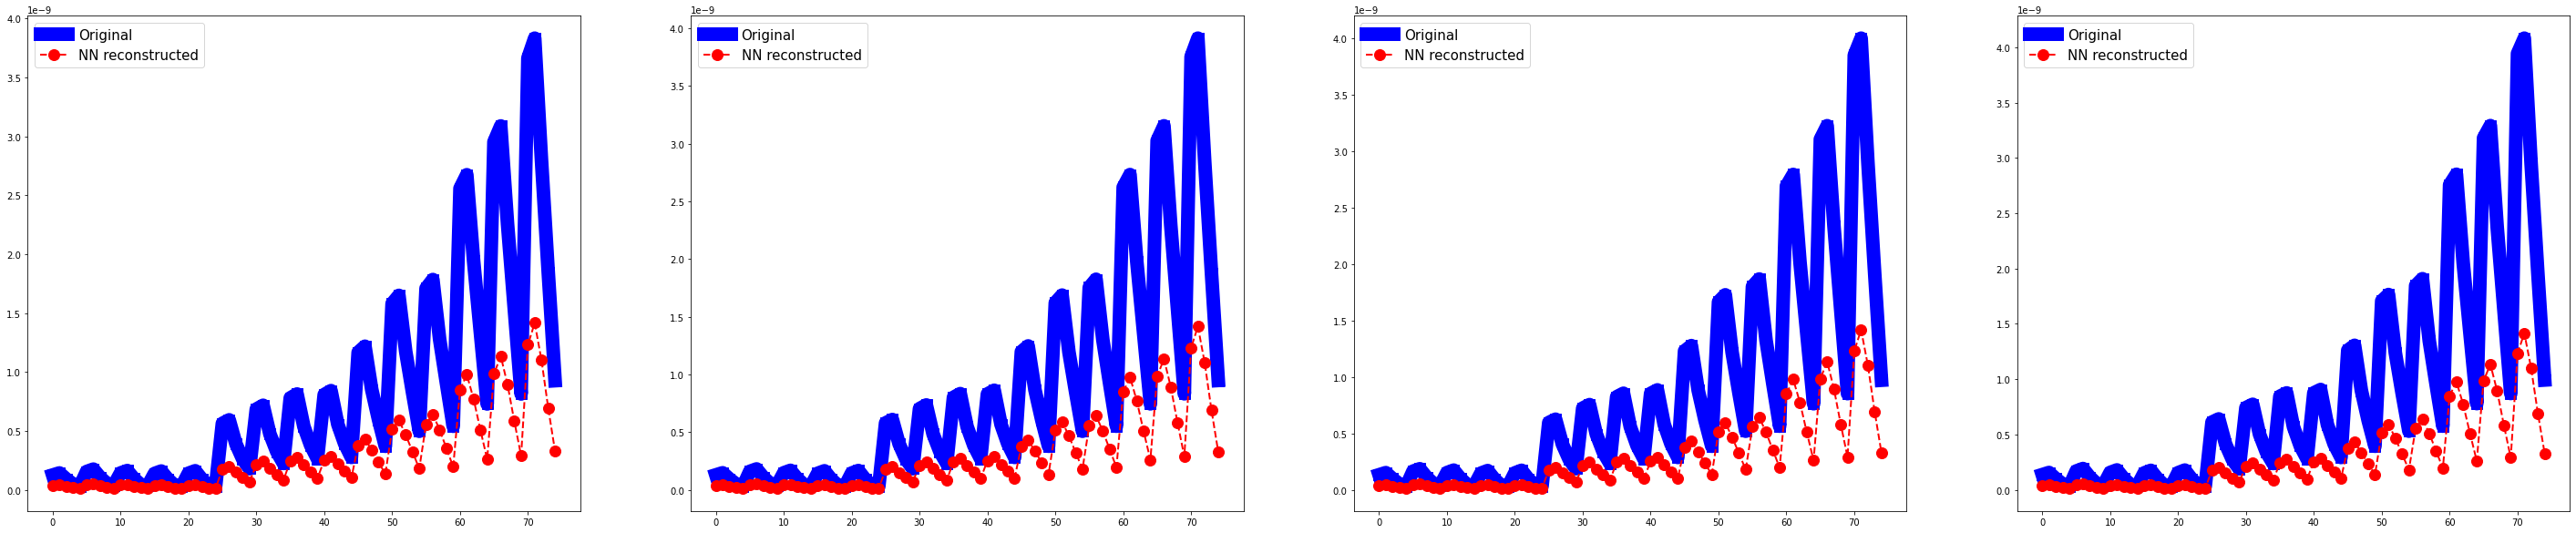

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50,10))
for i in range(4):
    pred = predicted_COSEBIs_Emodes[i]
    true = testing_COSEBIs_E_modes[i]
    ax[i].plot(true, 'blue', linewidth=15, markersize=12,label="Original", marker='s')
    ax[i].plot(pred, color='red', marker='o', linestyle='--', linewidth=2, markersize=12, label="NN reconstructed")
#     ax[i].set_xlim([-10, 80]) 
#     ax[i].set_ylim([3.6e-1, 1e-13])
    ax[i].legend(fontsize=15) 
    
    
#Saving the Graph
plt.savefig('true_examples_reconstruction_PP.png')

### Step 1: with samples you currently have plot the trainning set against cosmopower output

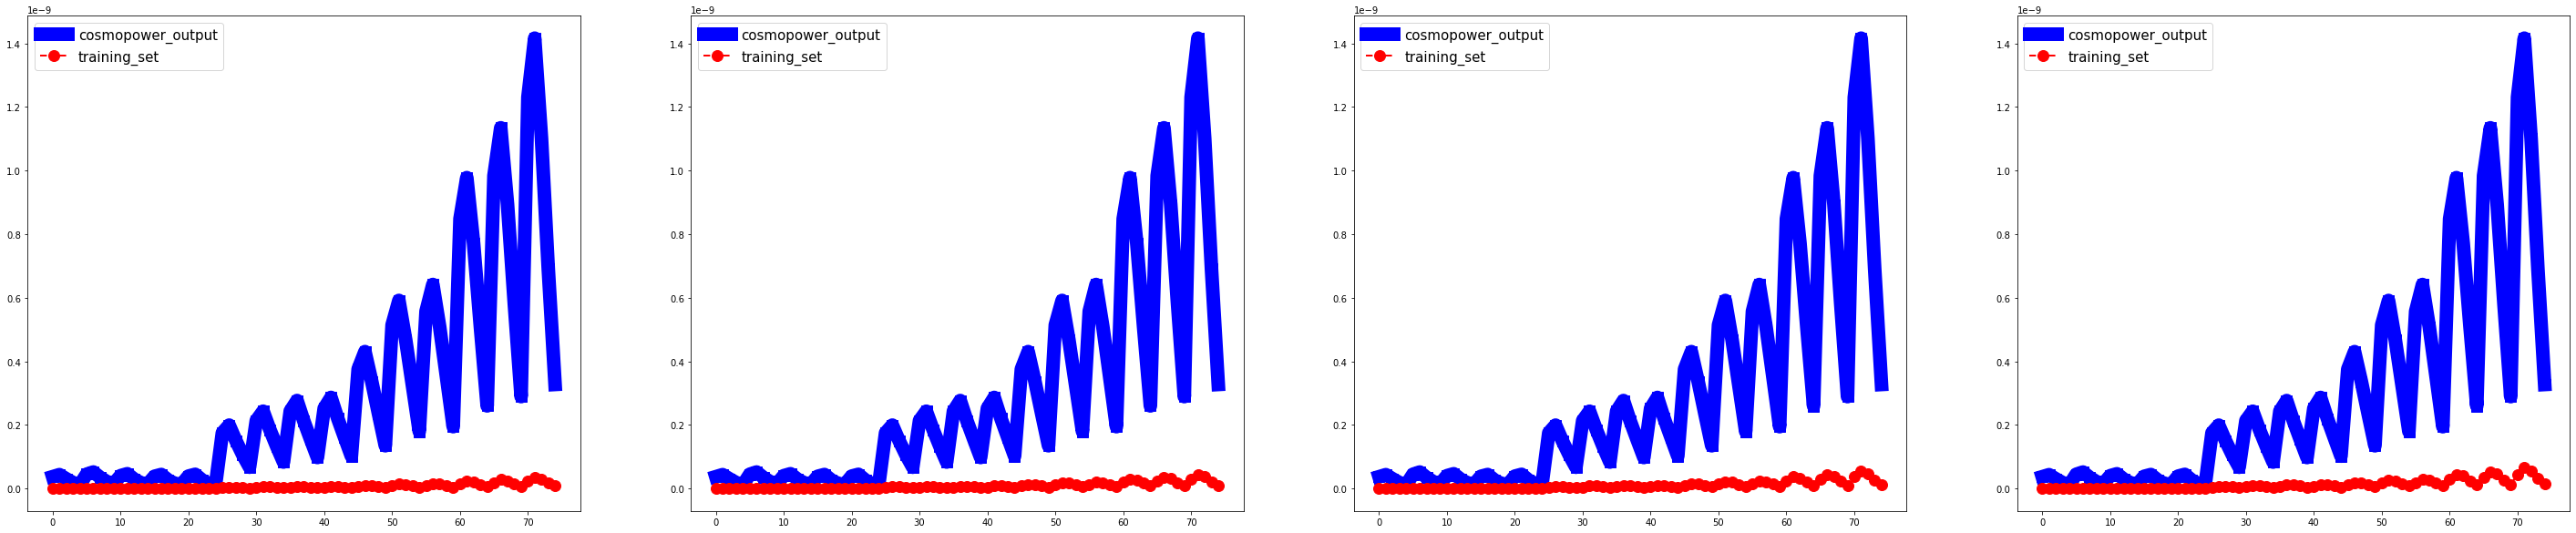

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50,10))
for i in range(4):
    cosmopower_output = predicted_COSEBIs_Emodes[i]
    training_set = COSEBIs[i]  
    ax[i].plot(cosmopower_output, 'blue', linewidth=15, markersize=12,label="cosmopower_output", marker='s')
    ax[i].plot(training_set, 'red', marker='o', linestyle='--', linewidth=2, markersize=12, label="training_set")
#     ax[i].set_xlim([-10, 80]) 
#     ax[i].set_ylim([3.6e-1, 1e-13])
    ax[i].legend(fontsize=15) 

#Saving the Graph 
plt.savefig('step1_visualization.png') 

## Step 2:  
- Then plot a test case that isn't in the training set but it is within the range of the training set. So an S_8_input that is between the minimum and the maximum values in the training set.

In [113]:
training_max = COSEBIs.max() 
training_max

3.75058388982587e-09

In [114]:
training_min = COSEBIs.min()
training_min

1.7114119727532914e-13

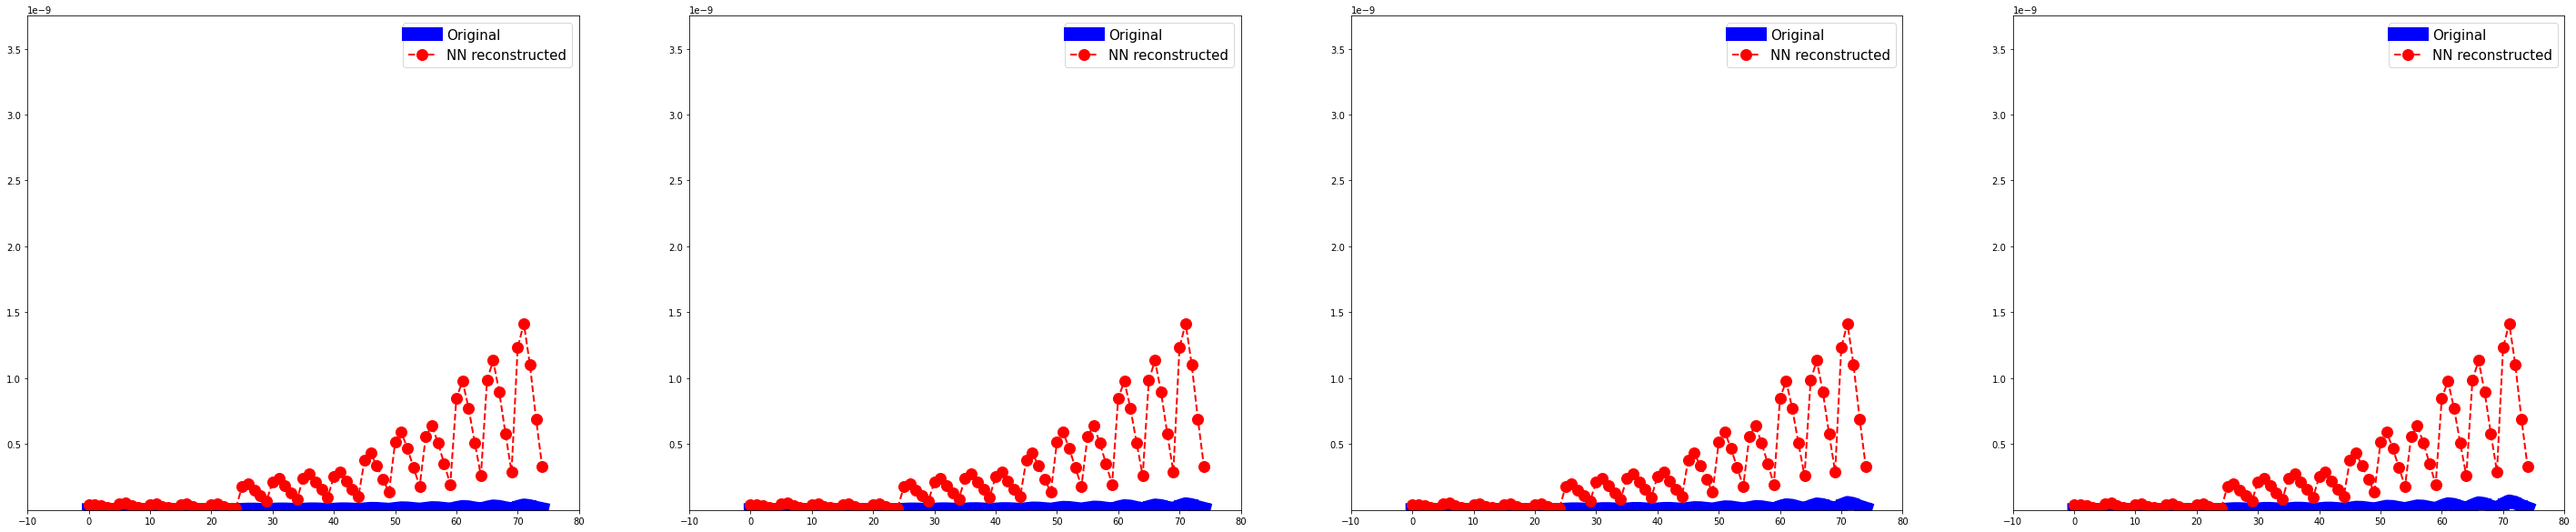

In [116]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50,10))
for i in range(4):
    pred = predicted_COSEBIs_Emodes[i]
    true = COSEBIs[i]
    ax[i].plot(true, 'blue', linewidth=15, markersize=12,label="Original", marker='s')
    ax[i].plot(pred, color='red', marker='o', linestyle='--', linewidth=2, markersize=12, label="NN reconstructed")
    ax[i].set_xlim([-10, 80]) 
    ax[i].set_ylim([training_min, training_max])
    ax[i].legend(fontsize=15) 
    
    
#Saving the Graph
plt.savefig('true_examples_reconstruction_PP.png')

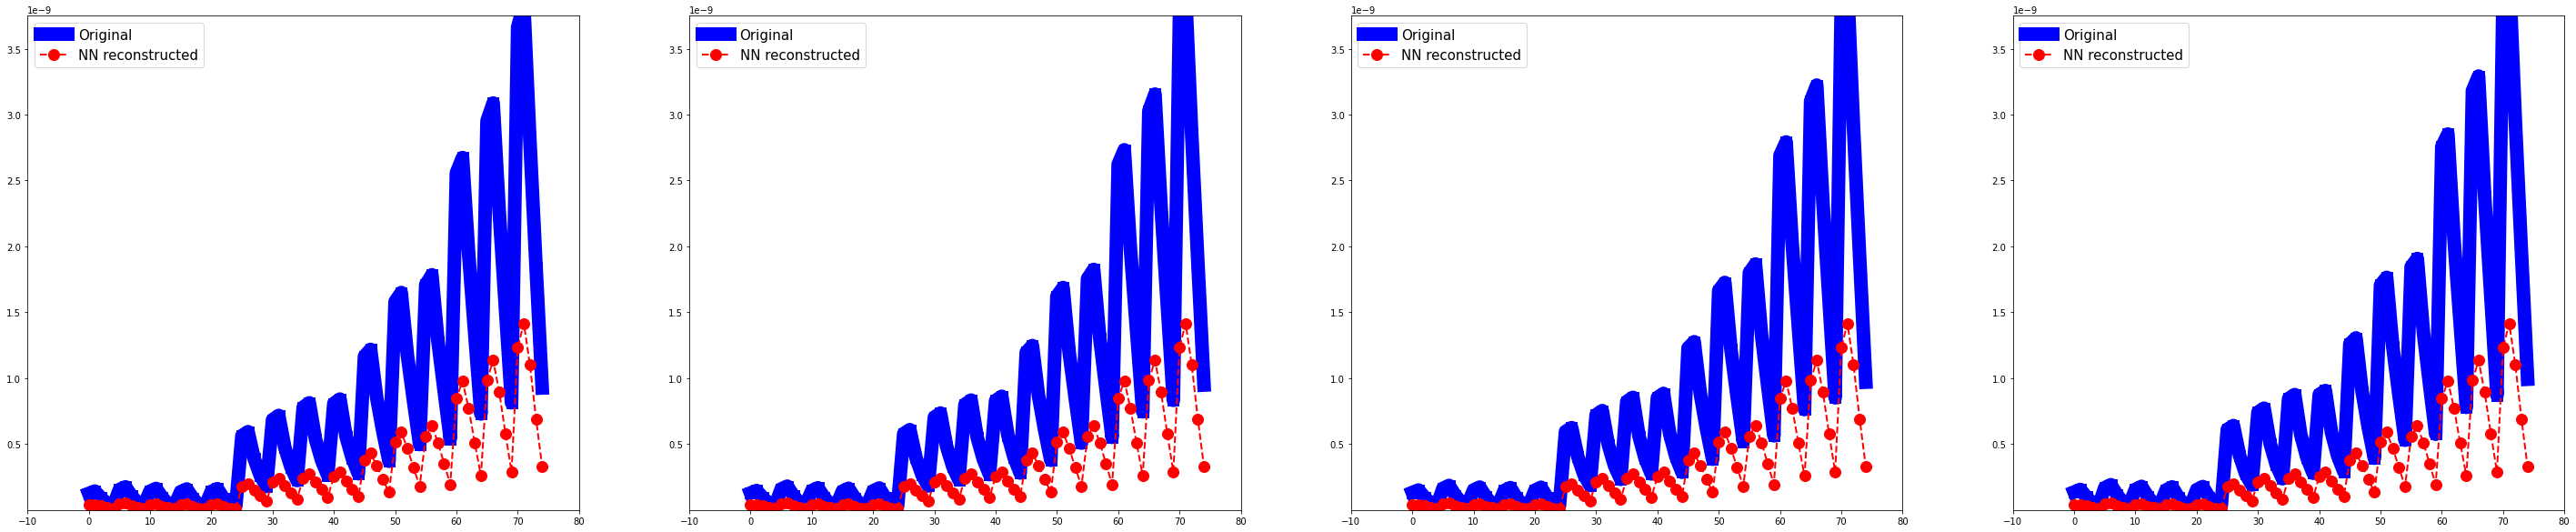

In [118]:
## Step 2b

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50,10))
for i in range(4):
    pred = predicted_COSEBIs_Emodes[i]
    true = testing_COSEBIs_E_modes[i]
    ax[i].plot(true, 'blue', linewidth=15, markersize=12,label="Original", marker='s')
    ax[i].plot(pred, color='red', marker='o', linestyle='--', linewidth=2, markersize=12, label="NN reconstructed")
    ax[i].set_xlim([-10, 80]) 
    ax[i].set_ylim([training_min, training_max])
    ax[i].legend(fontsize=15) 
    
    
#Saving the Graph
plt.savefig('true_examples_reconstruction_PP.png')

## Step 3: 
- If 1 and 2 don't work then, try to model ratios instead of the raw values. divide all of your training set by a cosebis vector that corresponds to the middle values in the value.ini file. then feed that into cosmopower. Then repeat 1 and 2 for the ratios.

In [119]:
# Get the fiducial values
middle_point_value = [0.1157, 0.0225, 0.6898, 0.969, 0.8128, 7.8, 1.0] 

In [120]:
# run the pipeline for the given parameters. All results are saved in block
block    = pipeline.run_parameters(middle_point_value)
stats_name_cosmosis ="cosebis"
 
# read in cosebis from block
nbin_a=block["shear_cl","nbin_a"] 
nbin_b=block["shear_cl","nbin_b"] 
counter=0
for i_bin in range(1,nbin_a+1): 
	for j_bin in range(1,nbin_b+1): 
		name_in="bin_"+str(j_bin)+("_")+str(i_bin)
		if(block.has_value(stats_name_cosmosis, name_in)):
			th = block[stats_name_cosmosis,name_in]
			if(counter==0):
				th_all_1=th.copy()
			else:
				th_all_1=np.hstack((th_all_1,th))
			counter+=1




# Other useful commands:
# list of varied parameter names
param_names_varied = pipeline.varied_params

sample_S8 took: 0.042 seconds
sigma8toAs took: 0.588 seconds
camb took: 5.544 seconds
load_nz_fits took: 0.004 seconds
extrapolate_power took: 0.122 seconds
linear_alignment took: 0.009 seconds
projection took: 0.935 seconds
cosebis took: 2.314 seconds
Total pipeline time: 9.56 seconds
Pipeline ran okay.


In [122]:
print(th_all_1)

[6.10161452e-11 7.06184838e-11 4.85104231e-11 2.92385905e-11
 1.90692189e-11 7.39688929e-11 8.41882480e-11 5.50322205e-11
 3.36053154e-11 2.48118394e-11 6.66847289e-11 7.55337857e-11
 4.66804347e-11 2.75998088e-11 2.25960002e-11 6.36605747e-11
 7.17718723e-11 4.22629276e-11 2.40654313e-11 2.14142548e-11
 6.45868615e-11 7.26807068e-11 4.22358427e-11 2.34640061e-11
 2.11479444e-11 2.85354133e-10 3.19945322e-10 2.38260551e-10
 1.69857164e-10 1.08337902e-10 3.48061049e-10 3.89916501e-10
 2.93950310e-10 2.12743232e-10 1.34604979e-10 3.96374784e-10
 4.43429590e-10 3.36840640e-10 2.47970631e-10 1.57734303e-10
 4.10633120e-10 4.59126457e-10 3.49314446e-10 2.58429651e-10
 1.64843788e-10 6.09039226e-10 6.89191312e-10 5.36858883e-10
 3.77427857e-10 2.16383583e-10 8.33132336e-10 9.46276855e-10
 7.46010831e-10 5.20305155e-10 2.88132548e-10 9.02674071e-10
 1.02639865e-09 8.12388307e-10 5.67048289e-10 3.12239623e-10
 1.37057441e-09 1.56334562e-09 1.23275250e-09 8.18920621e-10
 4.15973789e-10 1.588533

In [125]:
##  divide all of your training set by a cosebis vector that corresponds to the middle values in the value.ini file

model_ratio = COSEBIs/th_all_1

In [128]:
model_ratio

array([[0.00587568, 0.00877026, 0.01351741, ..., 0.01702721, 0.01551341,
        0.01465098],
       [0.00742409, 0.01103683, 0.01698552, ..., 0.02140315, 0.01950427,
        0.0184187 ],
       [0.00918009, 0.01357638, 0.02085161, ..., 0.02627633, 0.02395215,
        0.02261917],
       ...,
       [1.88308214, 1.8584586 , 1.75144357, ..., 1.50099471, 1.56017471,
        1.64914835],
       [1.94032812, 1.91450157, 1.80062358, ..., 1.52971129, 1.59292745,
        1.68946019],
       [1.99847273, 1.97147683, 1.85065689, ..., 1.55851153, 1.62581559,
        1.73020171]])

In [172]:
## then feed that into cosmopower

# list of parameter names, in arbitrary order required to train the `cosmopower_NN`
model_parameters =  ["s8_input"]

## Set up output nodes 
output_modes = list(range(1,76))

from cosmopower import cosmopower_NN,cosmopower_PCA,cosmopower_PCAplusNN

# instantiate NN class 
cp_nn = cosmopower_NN(parameters=model_parameters, 
                      modes=output_modes, 
                      n_hidden = [512, 512, 512], # 4 hidden layers, each with 128 nodes
                      verbose=True # useful to understand the different steps in initialisation and training
                      )
## Train Model
 
cp_nn.train(training_parameters=training_parameters,
                training_features=model_ratio,
                filename_saved_model='cosmosis_model_v3',
                # cooling schedule 
                validation_split=0.1, 
                learning_rates=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
                batch_sizes=[1024, 1024, 1024, 1024, 1024],
                gradient_accumulation_steps = [1, 1, 1, 1, 1],
                # early stopping set up
                patience_values = [100,100,100,100,100], 
                max_epochs = [1000,1000,1000,1000,1000],
                )


Initialized cosmopower_NN model, 
mapping 1 input parameters to 75 output modes, 
using 3 hidden layers, 
with [512, 512, 512] nodes, respectively. 

Starting cosmopower_NN training, 
using 10 per cent of training samples for validation. 
Performing 5 learning steps, with 
[0.01, 0.001, 0.0001, 1e-05, 1e-06] learning rates 
[1024, 1024, 1024, 1024, 1024] batch sizes 
[1, 1, 1, 1, 1] gradient accumulation steps 
[100, 100, 100, 100, 100] patience values 
[1000, 1000, 1000, 1000, 1000] max epochs 

learning rate = 0.01, batch size = 1024


 21%|█████▌                     | 207/1000 [00:06<00:26, 29.88it/s, loss=0.0233]


Validation loss = 0.021036653
Model saved.
Reached max number of epochs. Validation loss = 0.021036653
Model saved.
learning rate = 0.001, batch size = 1024


 73%|██████████████████▉       | 726/1000 [00:19<00:07, 36.43it/s, loss=0.00312]


Validation loss = 0.0012386541
Model saved.
Reached max number of epochs. Validation loss = 0.0012386541
Model saved.
learning rate = 0.0001, batch size = 1024


 15%|███▋                     | 149/1000 [00:04<00:24, 34.84it/s, loss=0.000576]


Validation loss = 0.00057019014
Model saved.
Reached max number of epochs. Validation loss = 0.00057019014
Model saved.
learning rate = 1e-05, batch size = 1024


 10%|██▌                      | 100/1000 [00:03<00:34, 25.98it/s, loss=0.000549]


Validation loss = 0.0005465499
Model saved.
Reached max number of epochs. Validation loss = 0.0005465499
Model saved.
learning rate = 1e-06, batch size = 1024


 10%|██▌                      | 100/1000 [00:03<00:27, 32.89it/s, loss=0.000514]


Validation loss = 0.0005069013
Model saved.
Reached max number of epochs. Validation loss = 0.0005069013
Model saved.


In [173]:
cp_nn = cosmopower_NN(restore=True, 
                      restore_filename='cosmosis_model_v3',
                      ) 

In [174]:
predicted_output = cp_nn.predictions_np(test_params)
predicted_output

array([[2.05350501, 2.02619704, 1.89889411, ..., 1.5867253 , 1.65755417,
        1.76922783],
       [2.11159767, 2.08341149, 1.94912453, ..., 1.61508491, 1.68989729,
        1.80964667],
       [2.17018378, 2.14117683, 1.99983939, ..., 1.64333581, 1.72215441,
        1.85020555],
       ...,
       [3.07917627, 3.04512248, 2.79053708, ..., 2.0354166 , 2.17508459,
        2.44987787],
       [3.14035998, 3.10640665, 2.84373506, ..., 2.05855066, 2.20227781,
        2.48801397],
       [3.20154704, 3.16773308, 2.89689327, ..., 2.08127417, 2.22906718,
        2.52585713]])

In [175]:
## Model rational for testing same way we did for the training set
model_ratio_test = testing_COSEBIs_E_modes/th_all_1 

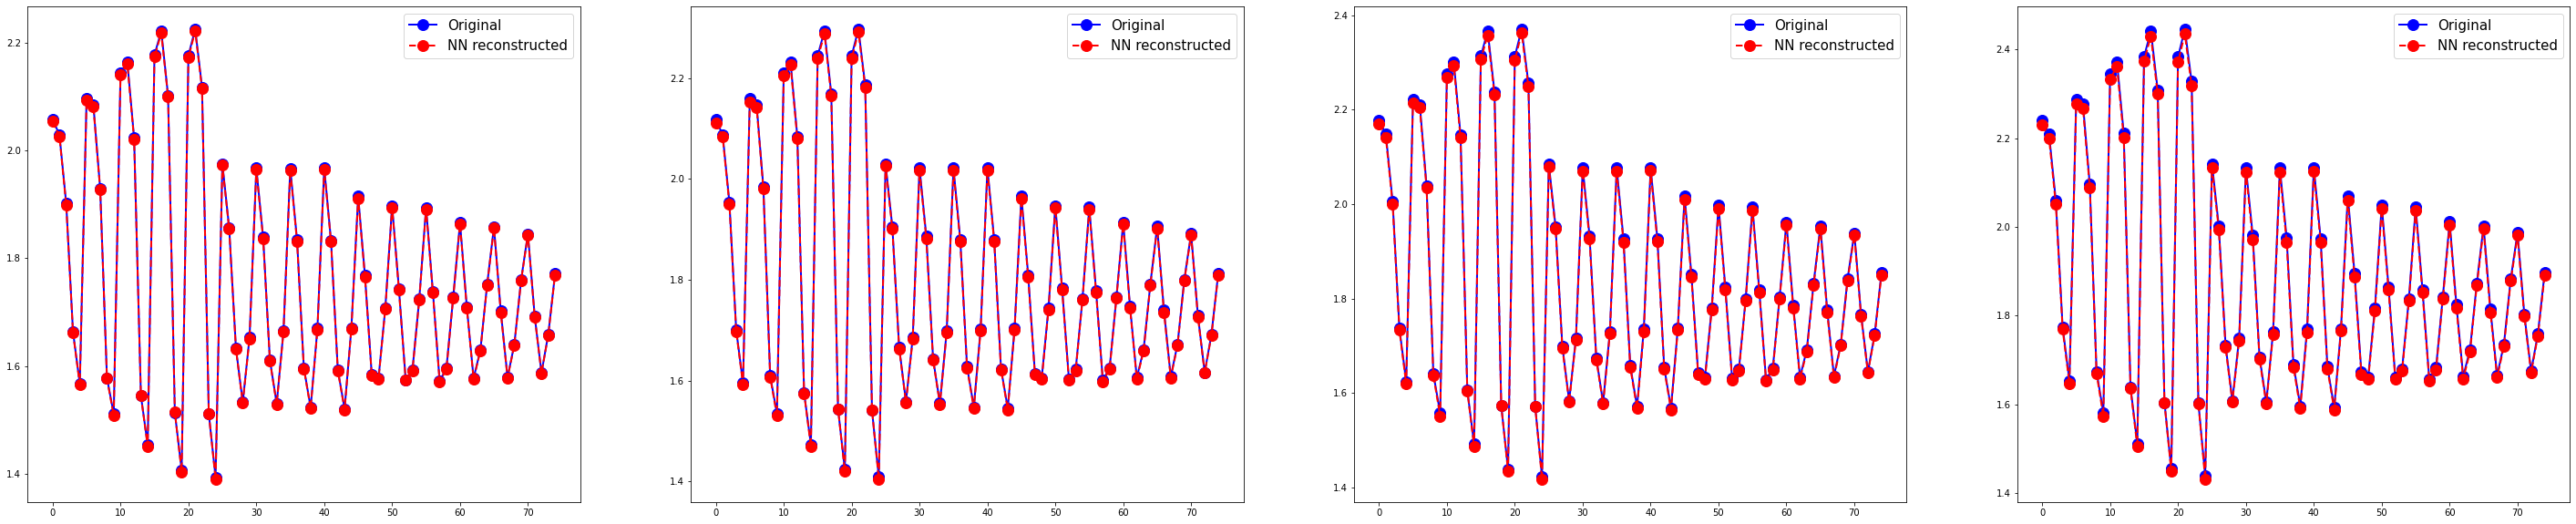

In [176]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50,10))
for i in range(4):
    pred = predicted_output[i]
    true = model_ratio_test[i]
    ax[i].plot(true, 'blue', linewidth=2, markersize=12,label="Original", marker='o')
    ax[i].plot(pred, color='red', marker='o', linestyle='--', linewidth=2, markersize=12, label="NN reconstructed")
#     ax[i].set_xlim([-10, 80]) 
#     ax[i].set_ylim([3.6e-1, 1e-13])
    ax[i].legend(fontsize=15) 
    
    
#Saving the Graph
plt.savefig('true_examples_reconstruction_PP.png')

### Accuracy
- This to carry how accurate `cosmopower_NN` predict to the test_data

In [177]:
# Mean squared error
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE = mean_squared_error(predicted_output, model_ratio_test, squared=False,)
MSE 

0.050251897981187475

In [178]:
# Root mean squared error
rmse = mean_squared_error(predicted_output, model_ratio_test, squared=True,)
rmse 

0.002720487397115083

In [179]:
Absolute_mean_error = mean_absolute_error(predicted_output,model_ratio_test)
Absolute_mean_error

0.03869271771636374